# Análise de negócio / Financeira

**Situação:**

Foi considerado que o cliente possuía uma política fictícia de gestão de risco de crédito (AS-IS), que consistia em reprovar qualquer pessoa com idade igual ou inferior a 28 anos. Ou seja, se alguém dessa faixa etária solicitasse crédito à instituição financeira, sua solicitação era automaticamente negada.

**Proposta de negócio:**

O score gerado pelo modelo de machine learning proposto foi utilizado para criar uma segunda política, denominada TO-BE. Esse modelo mapeou a propensão de uma pessoa a honrar o empréstimo (classe do bom pagador). Assim, o cliente poderia substituir o critério de ponto de corte (idade) por um novo ponto de corte (score). Dessa forma, na política TO-BE, as solicitações de crédito seriam reprovadas se o cliente estivesse com um score abaixo desse ponto de corte.

Para realizar a análise financeira do modelo, foi assumido que todas as pessoas na base de teste haviam solicitado crédito à instituição financeira, no valor fixo de R$1000,00 cada. Com base nisso, foram realizados os seguintes cálculos:

**(1) Carteira de crédito aprovado pela Política AS-IS:**
Determinaram-se os valores totais emprestados pela instituição considerando os critérios dessa política.

**(2) Dívida total pela Política AS-IS:**
Calculou-se o montante perdido pela financeira, assumindo que os clientes inadimplentes não pagaram nenhuma parcela do empréstimo.

**(3) Percentual de solicitações negadas pela Política AS-IS:**
Foi identificado o percentual de pessoas na base de Teste cuja solicitação de crédito foi negada. A partir desse percentual, estabeleceu-se um ponto de corte no Score que negaria o crédito para exatamente a mesma proporção de pessoas. Esse ponto de corte definiu a Política TO-BE.

**(4) Tamanho da carteira de crédito aprovado e dívida total na Política TO-BE:**
Com base no novo ponto de corte, calcularam-se o total emprestado e a dívida total.

**(5) Economia gerada pelo modelo:**
Compararam-se os resultados das políticas AS-IS e TO-BE para determinar o impacto financeiro positivo do modelo de machine learning proposto.

# Bibliotecas e importação de dados

In [1]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp 

In [2]:
X_test = pd.read_csv('outputs/X_test.csv')
y_test = pd.read_csv('outputs/y_test.csv')
df_test_scores = pd.read_csv('outputs/df_test_scores.csv')
y_score = pd.read_csv('outputs/y_score.csv',header=None)

### 1. Modelo AS-IS

In [3]:
# Definindo as condições do modelo AS-IS

y_pred_asis = (X_test['Age'] < 28) * 1

In [4]:
print(classification_report(y_test, y_pred_asis))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71     14200
           1       0.34      0.39      0.36      5800

    accuracy                           0.60     20000
   macro avg       0.54      0.54      0.54     20000
weighted avg       0.62      0.60      0.61     20000



In [5]:
# (1) Carteira de crédito aprovado pela Política AS-IS
# Quanto dinheiro foi emprestado no total?

sum(y_pred_asis == 0) * 1000

13315000

In [6]:
# (2) Dívida total pela Política AS-IS
# Qual o prejuízo?

1000 * sum((y_pred_asis == 0) & (y_test['target'] == 1))

3531000

In [7]:
# Quanto vai ganhar (R$)
13315000 - 3531000

9784000

* Na politica ASIS, aprova-se 81,77% das solicitações;
* Objetivo: com o novo score, deve-se aprovar a mesma quantidade de pessoas neste modelo

In [8]:
# Aprovação do modelo AS-IS

y_pred_asis.value_counts(normalize=True)[0]

np.float64(0.66575)

In [9]:
# Bons e maus do modelo AS-IS

y_pred_asis.value_counts()

Age
0    13315
1     6685
Name: count, dtype: int64

**Observação:** Utilizar os 13315 melhores scores como ponto de corte (melhores scores / aprovados). Nesse caso, foi o valor 13315 (total de aprovados no modelo AS-IS). Esse valor será encontrado para obter o ponto de corte do threshould.

### 2. Modelo To Be

In [10]:
df_tobe = df_test_scores[['score', 'target']]

In [11]:
# Ordenando os melhores scores

df_tobe = df_tobe.sort_values(by='score')

In [12]:
# Scores

df_tobe.head()

,score,target
19973,5.208275e-09,0
7545,6.177882e-09,0
1537,7.721815e-09,0
759,8.777510e-09,0
10289,1.589068e-08,0


In [13]:
# Aprovando a mesma quantidade de pessoas do modelo AS-IS

# Para achar o threshoul (ponto de corte)

df_tobe['score'].iloc[13315]

np.float64(0.1853969)

In [14]:
thr =  0.185397 # thr encontrado
y_pred_tobe = pd.Series((df_tobe['score'] >= thr) * 1)

In [15]:
# Aprovando o mesmo percentual de clientes do modelo ASIS

y_pred_tobe.value_counts()

score
0    13316
1     6684
Name: count, dtype: int64

In [16]:
# Emprestado

sum(y_pred_tobe == 0) * 1000

13316000

In [17]:
# Prejuízo

sum((y_pred_tobe == 0) & (y_test['target'] == 1)) * 1000

641000

In [18]:
# Ganho

13316000 - 641000

12675000

In [19]:
# Diferença de ganhos = AS-IS / TO BE - ECONOMIA GERADA PELO MODELO
as_is = 9784000
to_be = 12675000 

to_be - as_is

2891000

In [20]:
# Melhorar a análise de negócio / comparativos

### 3. Matriz de confusão

In [21]:
y_pred_new = (y_score > 0.286677) * 1

In [22]:
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92     14200
           1       0.79      0.86      0.82      5800

    accuracy                           0.89     20000
   macro avg       0.86      0.88      0.87     20000
weighted avg       0.90      0.89      0.89     20000



<Figure size 800x600 with 0 Axes>

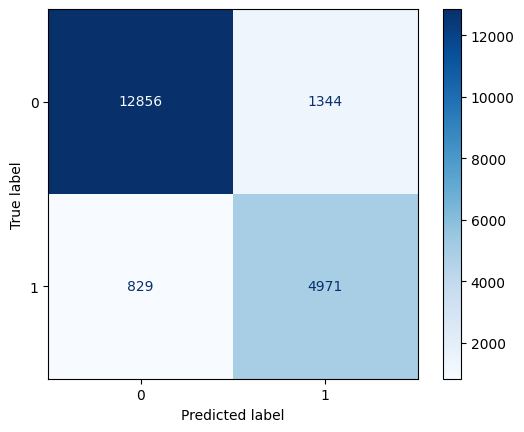

In [23]:
cm = confusion_matrix(y_test, y_pred_new)

plt.figure(figsize= (8,6))
ConfusionMatrixDisplay(cm).plot(cmap='Blues') 
plt.show()

De acordo com o resultado acima, percebeu-se que:

**[0, 0]: Verdadeiros negativos (12856)**  
O modelo previu corretamente que esses clientes não são inadimplentes.  
**[0, 1]: Falsos positivos (1344)**  
O modelo classificou erroneamente esses clientes como inadimplentes, mas na verdade não eram.  
**[1, 0]: Falsos negativos (829)**  
O modelo previu que esses clientes não eram inadimplentes, mas na verdade eram.  
**[1, 1]: Verdadeiros positivos (4971)**  
O modelo previu corretamente que esses clientes são inadimplentes.  

### 4. KS2

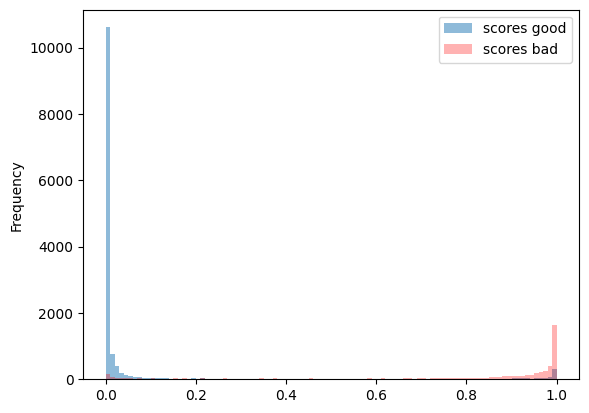

In [28]:
df_test_scores[df_test_scores['target'] == 0]['score'].plot(kind='hist', bins=100, label='scores good', alpha= 0.5)
df_test_scores[df_test_scores['target'] == 1]['score'].plot(kind='hist', bins=100, label='scores bad', color='red', alpha=0.3)
plt.legend()
plt.show()

In [27]:
ks_2samp(df_test_scores[df_test_scores['target'] == 1]['score'],
         df_test_scores[df_test_scores['target'] == 0]['score']
        )

KstestResult(statistic=np.float64(0.7985502671199611), pvalue=np.float64(0.0), statistic_location=np.float64(0.06914478), statistic_sign=np.int8(-1))

# Conclusões